In [2]:
# Importar Keras, TensorFlow y otras librerías útiles

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [3]:
# Importar el dataset

imdb_dataset = keras.datasets.imdb

# Al cargar el dataset se obtienen 4 arreglos NumPy

(train_data, train_labels), (test_data, test_labels) = imdb_dataset.load_data()

# Cada imagen corresponde a una sola label pero los nombres no están incluídos en el dataset
# Los guardamos en un array nombrándolos para ser usados después al graficar

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Normalización del training y test set.
# Acá se debería preprocesar la data para que cumpla con el formato requerido antes de entrenar al modelo.

train_images = train_images / 255.0

test_images = test_images / 255.0

In [5]:
### Construir el modelo ###


# Setear las capas
# Desnse significa que va a ser una red altamente conexa, donde el output de todas las neuronas de una capa
#son los inputs de las neuronas de la capa siguiente.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compilar el modelo

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
### Entrenar el modelo ###

# Alimentar el modelo usando los arrays obtenidos al cargar el dataset

model.fit(train_images, train_labels, epochs=10)

# Hacer chequeos para evaluar exactitud, y si no es la correcta, usar estrategias para prevenirlo


Epoch 1/10
1875/1875 [==============================] - 2s 978us/step - loss: 0.5054 - accuracy: 0.8225
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3771 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3378 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3126 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2952 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2803 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2587 - accuracy: 0.9024
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2486 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2

In [7]:
# Ejemplo de predicción

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

# Obtener array de 10 números que representan la posibilidad de matcheo para cada una de las 10 prendas.

predictions[0]


# Obtener la prenda con mayores posibilidades de matchear

np.argmax(predictions[0])

# Examinar el valor asociado a una de las 10 prendas en el array class_names[9]

test_labels[0]

9

In [8]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

(28, 28)
(1, 28, 28)
[[1.2233049e-07 9.9999964e-01 1.3623537e-10 2.0348777e-07 1.1072499e-10
  2.3308209e-17 1.2024833e-11 6.5736418e-22 8.8369383e-13 1.6943916e-16]]


1

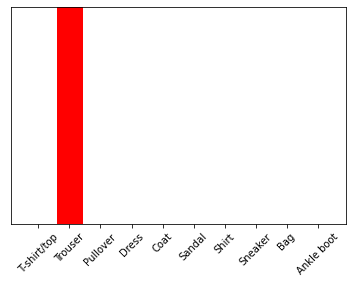

In [9]:
### Usar el modelo entrenado ###


# Tomar una imagen del dataset

img = test_images[2]
print(img.shape)

# Añadir la imagen a un conjunto en el que es el único elemento

img = (np.expand_dims(img,0))
print(img.shape)

# Predecir la label correcta para la imagen

predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


# Recolectar predicciones para la única imagen en el conjunto

np.argmax(predictions_single[0])